# Author: Aqib Aziz
## Eziline Internship Project

## Task 1: Clusterize the data and find items of each cluster

In [74]:
import numpy as np
import pandas as pd

In [75]:
data = pd.read_csv('Mobile Accessories Data per Customer.csv')

In [ ]:
data.head()

,purchase_id,item
0,1000,customized mobile cover
1,1000,QT82 Bluetooth Earbuds
2,1000,Samsung Galaxy Mobile Covers
3,1000,WIWU X10 Type-C Cable
4,1001,QT82 Bluetooth Earbuds


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7304 entries, 0 to 7303
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   purchase_id  7304 non-null   int64 
 1   item         7304 non-null   object
dtypes: int64(1), object(1)
memory usage: 114.2+ KB


### The data has two columns, purchase_id and item.. There are 7304 rows

----------------------------

In [78]:
grouping = data.groupby('purchase_id')

### describing the purchasing record

In [79]:
output = grouping.describe()

In [81]:
output.head()

item                                     
            count unique                      top freq
purchase_id                                           
1000            4      4  customized mobile cover    1
1001            3      3   QT82 Bluetooth Earbuds    1
1002            3      3     RTX Wireless Charger    1
1003            1      1   QT82 Bluetooth Earbuds    1
1004            3      3       OPPO Mobile Covers    1

##### it shows COUNT(number of items purchased), UNIQUE(number of unique items), TOP(top item purchased), FREQ(the count of the top item).      For example, id(1000) has bought 4 items and all are unique, the top item is customized mobile cover and it is purchased once.

### Clustering

In [82]:
from sklearn.cluster import KMeans

In [83]:
X = data[['purchase_id']]

In [84]:
model = KMeans(n_clusters=7)

In [85]:
model = model.fit(X)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [86]:
cluster_labels = model.labels_

In [87]:
cluster_labels

array([3, 3, 3, ..., 4, 4, 4])

### Visualizing the clusters

In [88]:
import matplotlib.pyplot as plt

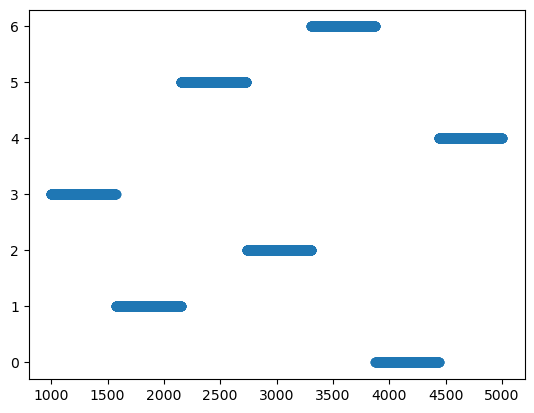

In [89]:
plt.scatter(X, cluster_labels)

### Saving output to csv

In [90]:
data['cluster_no'] = cluster_labels

In [91]:
data

,purchase_id,item,cluster_no
0,1000,customized mobile cover,3
1,1000,QT82 Bluetooth Earbuds,3
2,1000,Samsung Galaxy Mobile Covers,3
3,1000,WIWU X10 Type-C Cable,3
4,1001,QT82 Bluetooth Earbuds,3
...,...,...,...
7299,4997,Samsung Galaxy Mobile Covers,4
7300,4999,OPPO Mobile Covers,4
7301,4999,WIWU X10 Type-C Cable,4
7302,5000,customized mobile cover,4


In [93]:
data.to_csv('task1_output.csv')

--------------------------------